In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
#load the team related datasets into the notebook and save them as dataframes
def country_df(csv):
  df = pd.read_csv(csv)
  df.sort_values('HomeTeam', inplace=True)
  df.reset_index(inplace=True)
  df.drop("index", axis =1 , inplace=True)

  return df

df_france = country_df('FootballData/F1.csv')
df_spain  = country_df('FootballData/SP1.csv')
df_england  = country_df('FootballData/E0.csv')
df_championship  = country_df('FootballData/E1.csv')
#df_finland  = country_df('/content/drive/MyDrive/FootballData/FIN.csv')
#df_germany = country_df('FootballData/D1.csv')
df_england_22 = country_df('FootballData/E0_22.csv')
df_spa_22 = country_df('FootballData/SP1_22.csv')
#df_jpn = country_df('FootballData/JPN.csv')
df_ita = country_df('FootballData/I1.csv')
df_E1 = country_df('FootballData/E1.csv')
df_E2 = country_df('FootballData/E2.csv')
df_E3 = country_df('FootballData/E3.csv')
df_EC = country_df('FootballData/EC.csv')
df_F2 = country_df('FootballData/F2.csv')
df_I2 = country_df('FootballData/I2.csv')
df_dataE0 = country_df('FootballData/data (9)/E0.csv')
df_dataE1 = country_df('FootballData/data (9)/E1.csv')
df_dataE2 = country_df('FootballData/data (9)/E2.csv')
df_dataE3 = country_df('FootballData/data (9)/E3.csv')
df_dataEC = country_df('FootballData/data (9)/EC.csv')
df_dataF2 = country_df('FootballData/data (9)/F2.csv')
df_dataG1 = country_df('FootballData/data (9)/G1.csv')
df_dataN1 = country_df('FootballData/data (9)/N1.csv')
df_dataP1 = country_df('FootballData/data (9)/P1.csv')
df_dataSC0 = country_df('FootballData/data (9)/SC0.csv')
df_dataSC1 = country_df('FootballData/data (9)/SC1.csv')
df_dataSC2 = country_df('FootballData/data (9)/SC2.csv')
df_dataSC3 = country_df('FootballData/data (9)/SC3.csv')
df_dataSP2 = country_df('FootballData/data (9)/SP2.csv')
df_dataSP1 = country_df('FootballData/data (9)/SP1.csv')
df_dataT1 = country_df('FootballData/data (9)/T1.csv')

df_data8E0 = country_df('FootballData/data (8)/E0.csv')
df_data8E1 = country_df('FootballData/data (8)/E1.csv')
df_data8E2 = country_df('FootballData/data (8)/E2.csv')
df_data8E3 = country_df('FootballData/data (8)/E3.csv')
df_data8EC = country_df('FootballData/data (8)/EC.csv')
#df_data8F2 = country_df('FootballData/data (8)/F2.csv')
df_data8G1 = country_df('FootballData/data (8)/G1.csv')
#df_data8N1 = country_df('FootballData/data (8)/N1.csv')
#df_data8P1 = country_df('FootballData/data (8)/P1.csv')
df_data8SC0 = country_df('FootballData/data (8)/SC0.csv')
df_data8SC1 = country_df('FootballData/data (8)/SC1.csv')
df_data8SC2 = country_df('FootballData/data (8)/SC2.csv')
df_data8SC3 = country_df('FootballData/data (8)/SC3.csv')
#df_data8SP2 = country_df('FootballData/data (8)/SP2.csv')
df_data8SP1 = country_df('FootballData/data (8)/SP1.csv')
df_data8T1 = country_df('FootballData/data (8)/T1.csv')
df_B1 = country_df('FootballData/B1.csv')



data = pd.concat([df_france, df_spain, df_england, df_championship, df_england_22, df_spa_22, df_ita,df_E1,df_E2,df_E3,df_EC,df_F2,df_I2,df_dataE0,df_dataE1,df_dataE2,df_dataE3,df_dataEC,df_dataF2,df_dataG1,df_dataN1,df_dataP1,df_dataSC0,df_dataSC1,df_dataSC2,df_dataSC3,df_dataSP1,df_dataSP2,df_dataT1,
                  df_data8E0,df_data8E1,df_data8E2,df_data8E3,df_data8EC,df_data8G1,df_data8SC0,df_data8SC1,df_data8SC2,df_data8SC3,df_data8SP1,df_data8T1], sort = False)




In [3]:
data.shape

(15744, 139)

In [4]:
data.isna().sum()

Div             0
Date            0
HomeTeam        0
AwayTeam        0
FTHG            0
            ...  
AvgCAHH     14984
AvgCAHA     14984
BSH          5823
BSD          5823
BSA          5823
Length: 139, dtype: int64

In [5]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BSH,BSD,BSA
0,F1,04/03/06,Ajaccio,Lyon,1,3,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,18/03/06,Ajaccio,Monaco,1,0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1,08/04/06,Ajaccio,Toulouse,1,0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,20/08/05,Ajaccio,Le Mans,0,0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,13/05/06,Ajaccio,St Etienne,3,1,H,3.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HY,AY,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BSH,BSD,BSA
count,15744.000000,15744.000000,15743.000000,15743.000000,11327.000000,11327.000000,11327.000000,11327.000000,11342.000000,11342.000000,...,759.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,9921.000000,9921.000000,9921.000000
mean,1.437500,1.100356,0.643079,0.479896,12.011654,9.577911,5.742827,4.544010,1.448774,1.818815,...,1.957036,1.962368,1.967145,2.021408,2.027342,1.936118,1.940961,2.287810,3.413472,3.787174
std,1.219339,1.066113,0.803825,0.689384,4.622596,4.110183,2.974402,2.615035,1.250896,1.364154,...,0.099912,0.104936,0.104870,0.104814,0.109980,0.094286,0.093737,0.989092,0.486010,2.086802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.580000,1.710000,1.610000,1.810000,1.650000,1.730000,1.600000,1.080000,2.620000,1.050000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,4.000000,3.000000,0.000000,1.000000,...,1.880000,1.880000,1.880000,1.940000,1.940000,1.860000,1.860000,1.730000,3.250000,2.600000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,9.000000,5.000000,4.000000,1.000000,2.000000,...,1.960000,1.960000,1.960000,2.015000,2.020000,1.935000,1.940000,2.100000,3.250000,3.200000
75%,2.000000,2.000000,1.000000,1.000000,15.000000,12.000000,7.000000,6.000000,2.000000,3.000000,...,2.040000,2.040000,2.050000,2.102500,2.110000,2.010000,2.020000,2.500000,3.500000,4.330000
max,9.000000,9.000000,6.000000,5.000000,44.000000,33.000000,24.000000,18.000000,8.000000,9.000000,...,2.200000,2.480000,2.270000,2.520000,2.310000,2.420000,2.200000,23.000000,9.000000,23.000000


In [7]:
data = data[["FTHG","FTAG","FTR","HTHG","HTAG","B365H","B365D","B365A"]]

In [8]:
data.shape

(15744, 8)

In [9]:
data.head()

,FTHG,FTAG,FTR,HTHG,HTAG,B365H,B365D,B365A
0,1,3,A,0.0,0.0,5.0,3.30,1.61
1,1,0,H,1.0,0.0,3.0,2.87,2.30
2,1,0,H,0.0,0.0,2.2,2.75,3.40
3,0,0,D,0.0,0.0,1.9,2.87,4.20
4,3,1,H,3.0,0.0,2.4,3.00,2.70


In [10]:
data.isna().sum()

FTHG      0
FTAG      0
FTR       0
HTHG      1
HTAG      1
B365H    27
B365D    27
B365A    27
dtype: int64

In [11]:
data.loc[data.isnull().any(axis=1)]

,FTHG,FTAG,FTR,HTHG,HTAG,B365H,B365D,B365A
62,2,1,H,2.0,0.0,NaN,NaN,NaN
264,4,0,H,2.0,0.0,NaN,NaN,NaN
139,1,0,H,0.0,0.0,NaN,NaN,NaN
84,2,2,D,0.0,1.0,NaN,NaN,NaN
346,1,2,A,1.0,1.0,NaN,NaN,NaN
384,2,1,H,0.0,1.0,NaN,NaN,NaN
5,4,0,H,3.0,0.0,NaN,NaN,NaN
34,0,0,D,0.0,0.0,NaN,NaN,NaN
96,4,2,H,3.0,2.0,NaN,NaN,NaN
119,3,0,H,1.0,0.0,NaN,NaN,NaN


In [12]:
# Create a boolean mask for rows with NaN values
mask = data.isnull().any(axis=1)

# Delete rows using the mask
data = data[~mask]

In [13]:
data['FTR'] = data['FTR'].map({'H':0,'D':1,'A':2})

In [14]:
#adding .values for the neural network
X=data.drop("FTR", axis=1).values
Y=data["FTR"].values

In [15]:
X.shape

(15716, 7)

In [16]:
Y.shape

(15716,)

In [17]:
Y

array([2, 0, 0, ..., 0, 0, 0])

In [18]:
from sklearn.preprocessing import StandardScaler
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Split the data to train and test dataset.
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2)

In [20]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [21]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [22]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,32)
        self.hidden_layer1  = nn.Linear(32,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [23]:
input_dim  = 7
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)

In [24]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [25]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")


In [26]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [27]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.0004, Test Loss: 0.0006
Epoch 100/1000, Train Loss: 0.0001, Test Loss: 0.0002
Epoch 150/1000, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 200/1000, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 250/1000, Train Loss: 0.0000, Test Loss: 0.0001
Epoch 300/1000, Train Loss: 0.0000, Test Loss: 0.0001
Epoch 350/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 400/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 450/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 500/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 550/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 600/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 650/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 700/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 750/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 800/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 850/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 900/1000, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 950/1000, Train Loss: 0

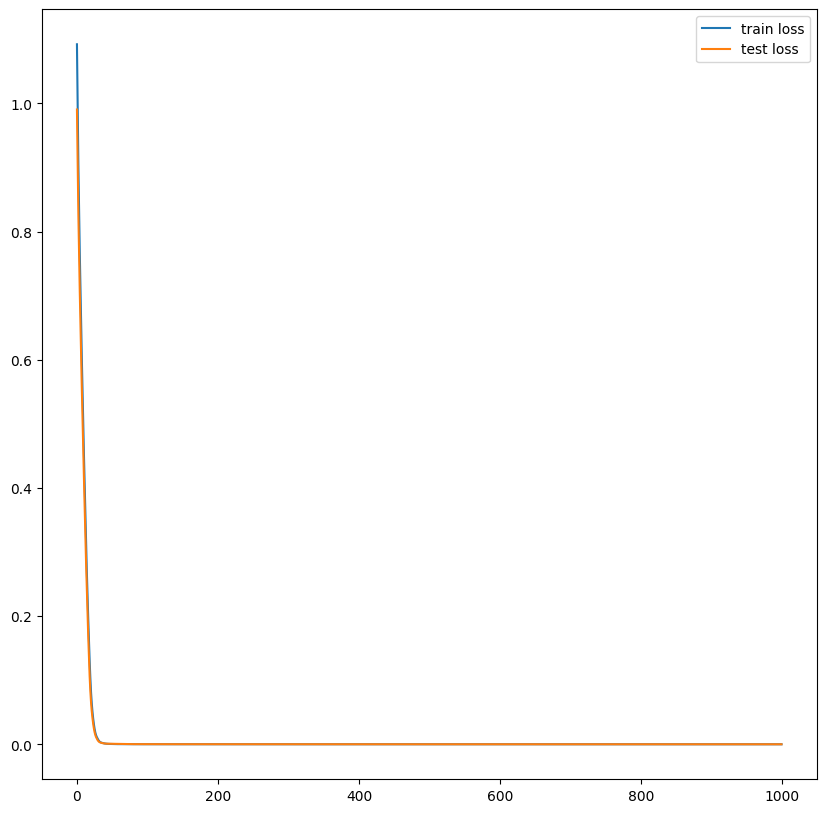

In [28]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [29]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [30]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [31]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [32]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 100.0
Test Accuracy: 100.0


In [86]:
#["FTHG","FTAG","FTR","HTHG","HTAG","B365H","B365D","B365A"]
X_new = np.array([[1,0,2,1,2.55,3.05,3.00]])
X_net = torch.FloatTensor(X_new)

In [87]:
torch.manual_seed(42)
# During inference or evaluation, apply softmax to obtain class probabilities
model.eval()
with torch.no_grad():
    prediction = model(X_net)

    print("Prediction of Games: {}".format(prediction))

    

Prediction of Games: tensor([[ 26.5932,   0.7548, -33.4934]])
